Term Project Milestone 1 Sales Prediction Using Social Media Ads

Begin Milestone 1 with a 250-500-word narrative describing your original idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model. Then, do a graphical analysis creating a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Your analysis should begin to answer the question(s) you are addressing. Write a short overview/conclusion of the insights gained from your graphical analysis.

Social Media Advertising plays a vital role in today’s business. It helps marketers to build relationships with their customers and increase sales. Marketers are using social media to advertise their products and generate sales. Social networking sites such as YouTube, Facebook, and Instagram are essential in today’s competitive business for boosting the sales of the firm. Social media advertisements can steer users to deals that they would most likely search for anyway, making the reality of a sale, impulse or not, higher. It's up to the company to channel customer impulses to make more effective sales. Social media advertising allows businesses to target specific groups of people based on their demographics, interests, and behaviors. This means that businesses can create ads that are more personalized and relevant to their target audience, increasing the likelihood of engagement and conversion.
Top social media sites are becoming effective marketing tools, perhaps taking the place of more conventional options like TV ads or brochures. The internet is a key marketing tool that may be utilized to increase brand awareness, draw in clients, and establish credibility.
Using Sentiment analysis: Sentiment analysis is the practice of looking into audience remarks to find out if they have neutral, positive, or negative associations. The findings assist companies in understanding how consumers feel about their goods and services. Customer care representatives should use sentiment analysis and respond appropriately. Of course, as the audience grows, manual sentiment analysis will become a time-consuming process, therefore using machine learning may help.
The products you are selling aren’t perfect for everyone. For instance, a person in college (teens and 20s) will spend more on books, courses, and other educational related materials compared to someone who is not in college (mostly in their 30s and 40s). A high-earner may afford to spend more money on luxury items than a person with a low income.
So, by categorizing their social media adverts, a company may ascertain if a customer would purchase their goods or not. We will now demonstrate how you can achieve this using a Decision Tree classifier.

Using the fictional dataset of Gender, Age, Salary, Purchased (Target variable), the company wants to know whether a customer will buy its product or not. Based on Salary or Gender who will most likely be buying their products? 

In [1]:
#import Useful Library
import pandas as pd
import numpy as np

#for making graph
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("C:/Users/Winquistt/DSC 550/Final/Social_network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#check to see if there are any null values 
df.describe() 
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.isnull().mean()

User ID            0.0
Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

In [5]:
#no missing values to clean up 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


The dataset we are using for the purpose of classifying social media ads and it indicates whether or not a person of a certain age and a given estimated wage or income buys the product.

In [7]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [8]:
df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<Axes: xlabel='Purchased', ylabel='Age'>

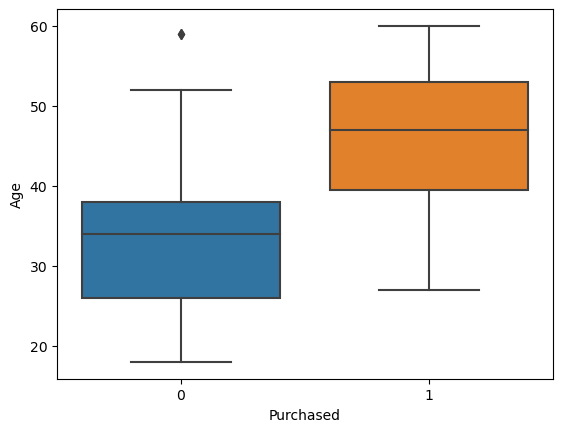

In [9]:
sns.boxplot(y='Age', x='Purchased', data=df)

THis boxplot shows that the distribution of age that purchased after looking 

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

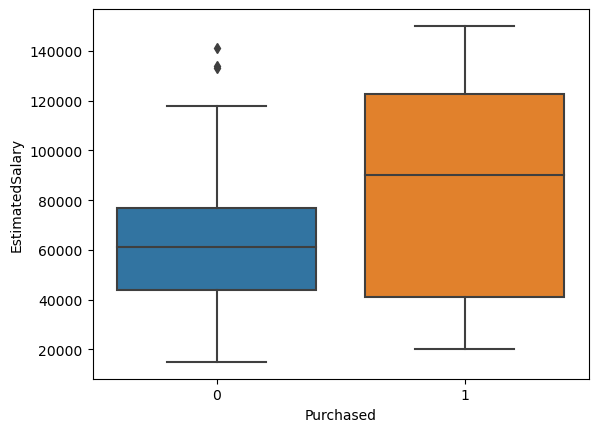

In [10]:
sns.boxplot(y='EstimatedSalary', x='Purchased', data=df)

This boxplot shows between femailes and males what their estimated salary was. Males was 0 and Females is 1

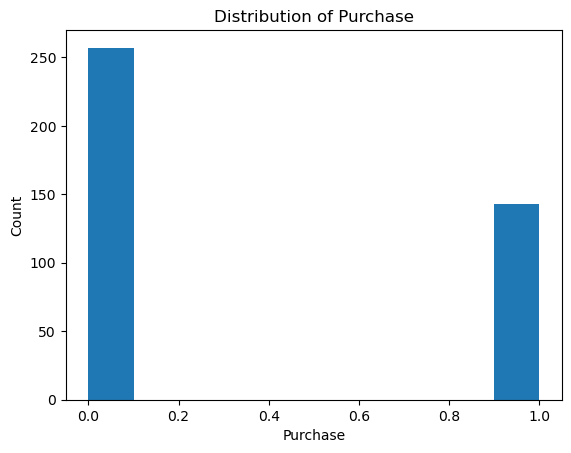

In [11]:
plt.hist(x="Purchased", data=df);
plt.title('Distribution of Purchase');
plt.ylabel('Count');
plt.xlabel('Purchase');

By this histogram we have clear idea that by the social media ads most of the are not purchased the product. In this notebook We will deep dive into the data and try to find the reason and explore it further.

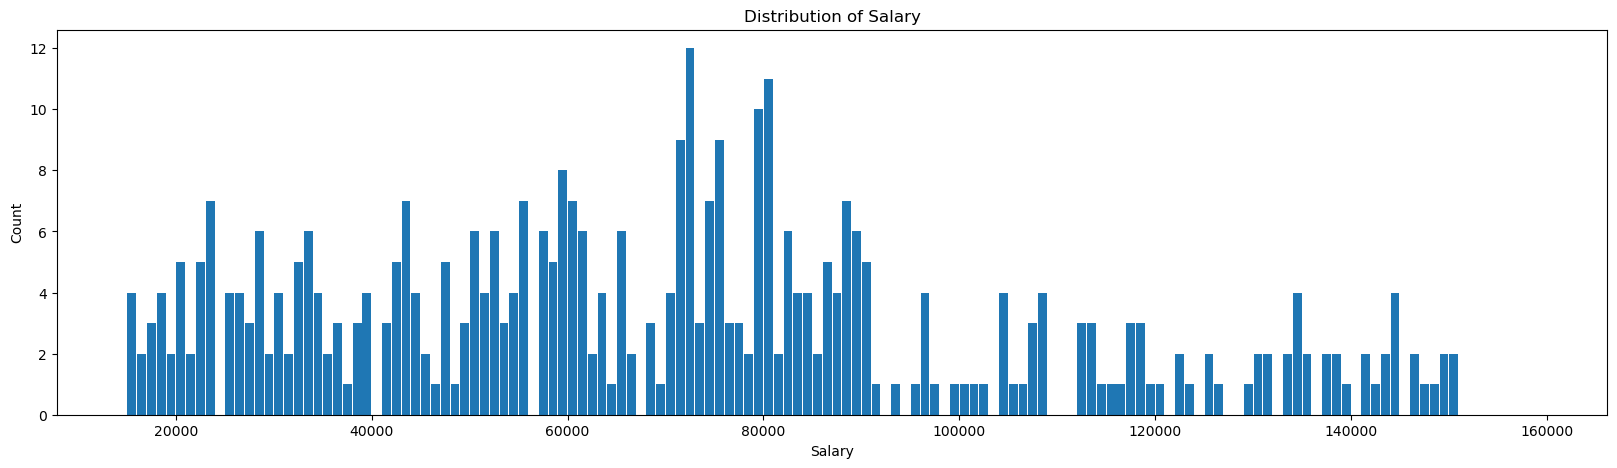

In [12]:
plt.figure(figsize=(20,5))
bins_size = np.arange(15000,150000+10000,1000)
plt.hist(x="EstimatedSalary", data=df, bins= bins_size,rwidth=0.9);
plt.title('Distribution of Salary');
plt.ylabel('Count');
plt.xlabel('Salary');

The chart is better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable frequency with their Annual Income ranging from approx 75k US Dollars and 80K US Dollars. The average salary of the customers is 69742.5

In [13]:
df.EstimatedSalary.mean()

69742.5

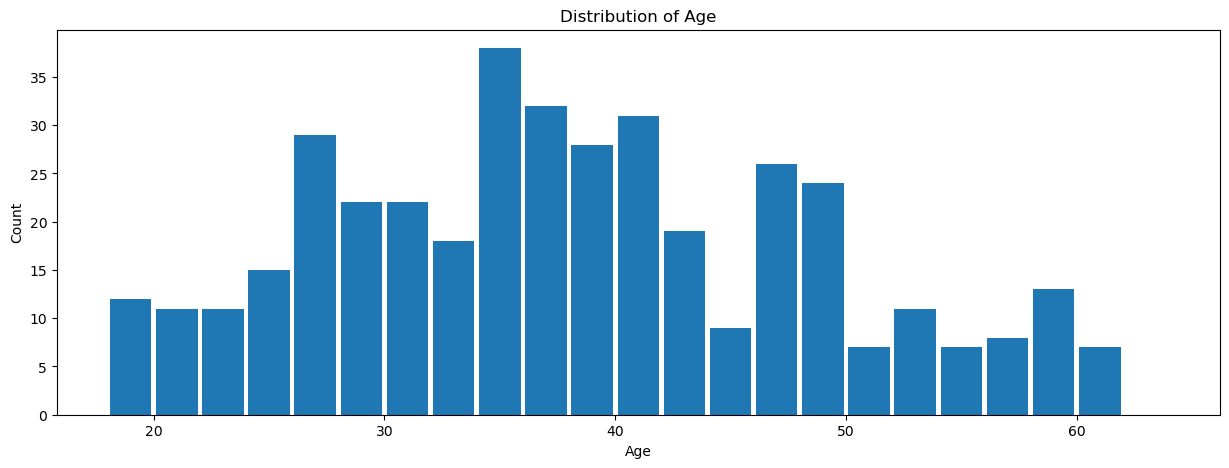

In [14]:
plt.figure(figsize=(15,5))
bins_size = np.arange(18,65,2)
plt.hist(x="Age", data=df, bins= bins_size,rwidth=0.9);
plt.title('Distribution of Age');
plt.ylabel('Count');
plt.xlabel('Age');

By looking at the above graph-, It can be seen that the Ages from 27 to 42 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison of youngsters.

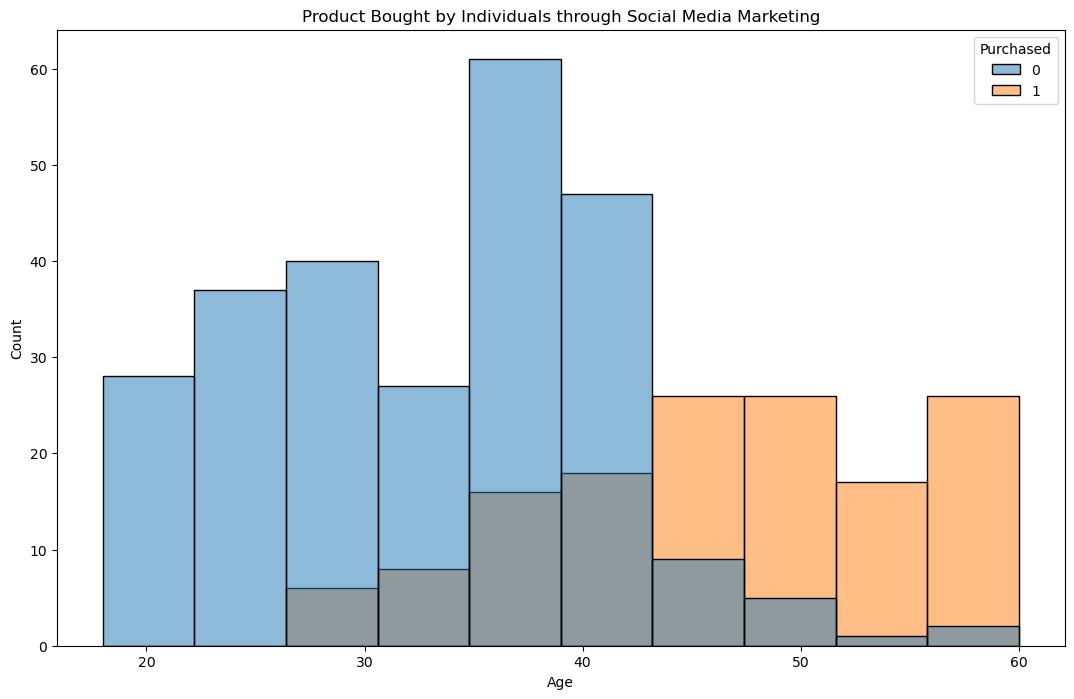

In [15]:
plt.figure(figsize=(13, 8))
plt.title("Product Bought by Individuals through Social Media Marketing")
sns.histplot(data=df, x="Age", hue="Purchased")
plt.show()

dataset trend — age range
You will notice from the visualization the age range of people that are likely to buy the product are people over 45 years of age. Where 0 simply refers to people not likely to buy and 1 refers to people most likely to buy.

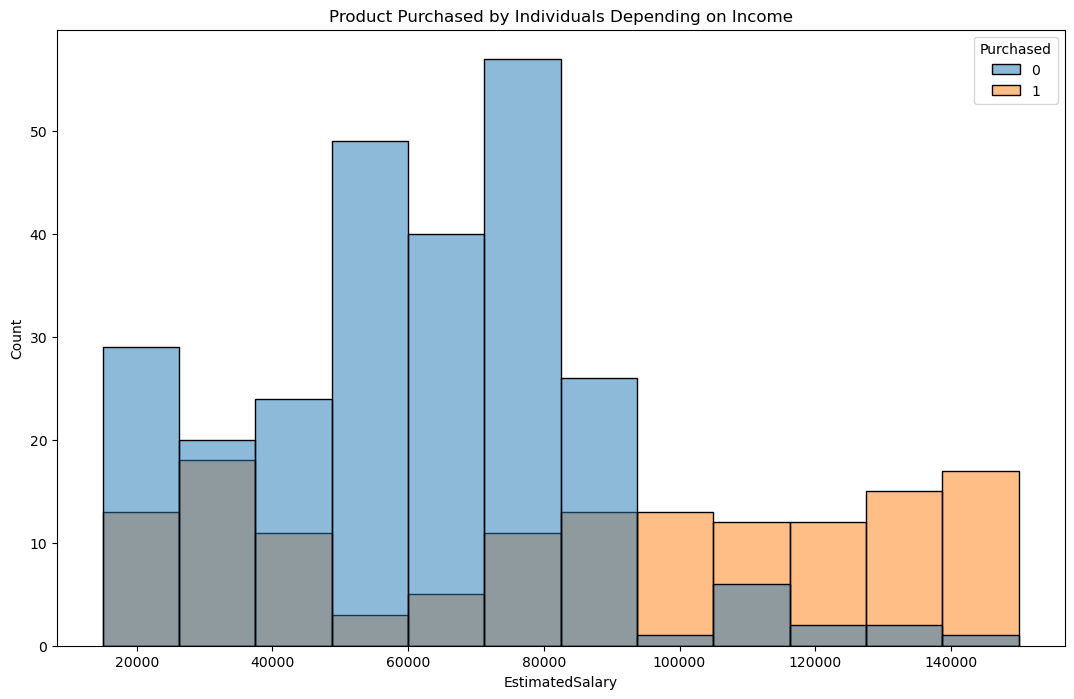

In [16]:
plt.figure(figsize=(13, 8))
plt.title("Product Purchased by Individuals Depending on Income")
sns.histplot(data=df, x="EstimatedSalary", hue="Purchased")
plt.show()

According to the visualization above, the target audience’s members who make above $90,000 per month are more likely to buy the product.

In [17]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


So far based on the graghs that I have presented, we can see a good example of how to use EDA for predicting who will buy based on these predictions  

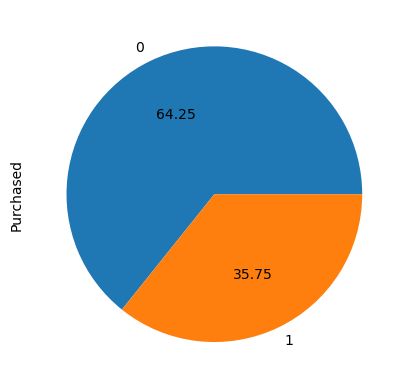

In [18]:
df['Purchased'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

Milestone 2 Now that you have created your idea, located data, and have started your graphical analysis, you will move on to the data preparation process of your project.

In [19]:
#unique values for each column
df["Purchased"].unique()

array([0, 1], dtype=int64)

In [20]:
df["EstimatedSalary"].unique()

array([ 19000,  20000,  43000,  57000,  76000,  58000,  84000, 150000,
        33000,  65000,  80000,  52000,  86000,  18000,  82000,  25000,
        26000,  28000,  29000,  22000,  49000,  41000,  23000,  30000,
        74000, 137000,  16000,  44000,  90000,  27000,  72000,  31000,
        17000,  51000, 108000,  15000,  79000,  54000, 135000,  89000,
        32000,  83000,  55000,  48000, 117000,  87000,  66000, 120000,
        63000,  68000, 113000, 112000,  42000,  88000,  62000, 118000,
        85000,  81000,  50000, 116000, 123000,  73000,  37000,  59000,
       149000,  21000,  35000,  71000,  61000,  75000,  53000, 107000,
        96000,  45000,  47000, 100000,  38000,  69000, 148000, 115000,
        34000,  60000,  70000,  36000,  39000, 134000, 101000, 130000,
       114000, 142000,  78000, 143000,  91000, 144000, 102000, 126000,
       133000, 147000, 104000, 146000, 122000,  97000,  95000, 131000,
        77000, 125000, 106000, 141000,  93000, 138000, 119000, 105000,
      

In [21]:
df["Age"].unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54], dtype=int64)

In [22]:
df.duplicated().sum()

0

In [23]:
df.EstimatedSalary.nunique()

117

In [24]:
#User ID will not be useful for predicting the outcome of sales 
df.drop(['User ID'], axis=1, inplace=True)

In [25]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


The closer to 1, the stronger the correlation between these variables.
A minus sign means that these 2 variables are negatively correlated, i.e. one decreases with increasing the other and vice versa.

In [26]:
df.tail()

,Gender,Age,EstimatedSalary,Purchased
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0
399,Female,49,36000,1


<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

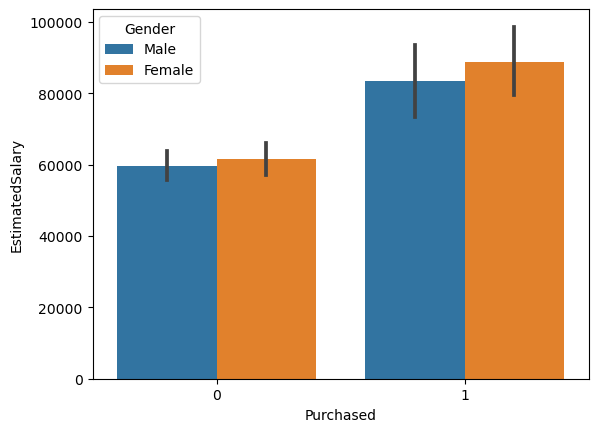

In [27]:
sns.barplot(x="Purchased", y="EstimatedSalary",hue='Gender', data=df)

Females have higher average salary
Females purchase more 

In [28]:
df.Gender.replace({'Male':1,
                   'Female':0}, inplace=True)

In [29]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [30]:
list(df.select_dtypes(['object']).columns)

[]

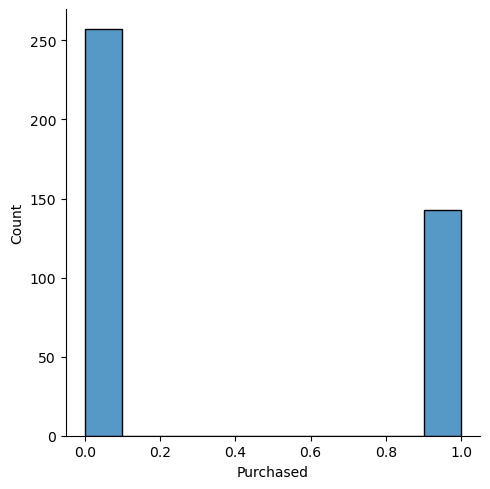

In [31]:
sns.displot(df['Purchased']);# this is just to see a gragh of Sales Price - not to test and split 

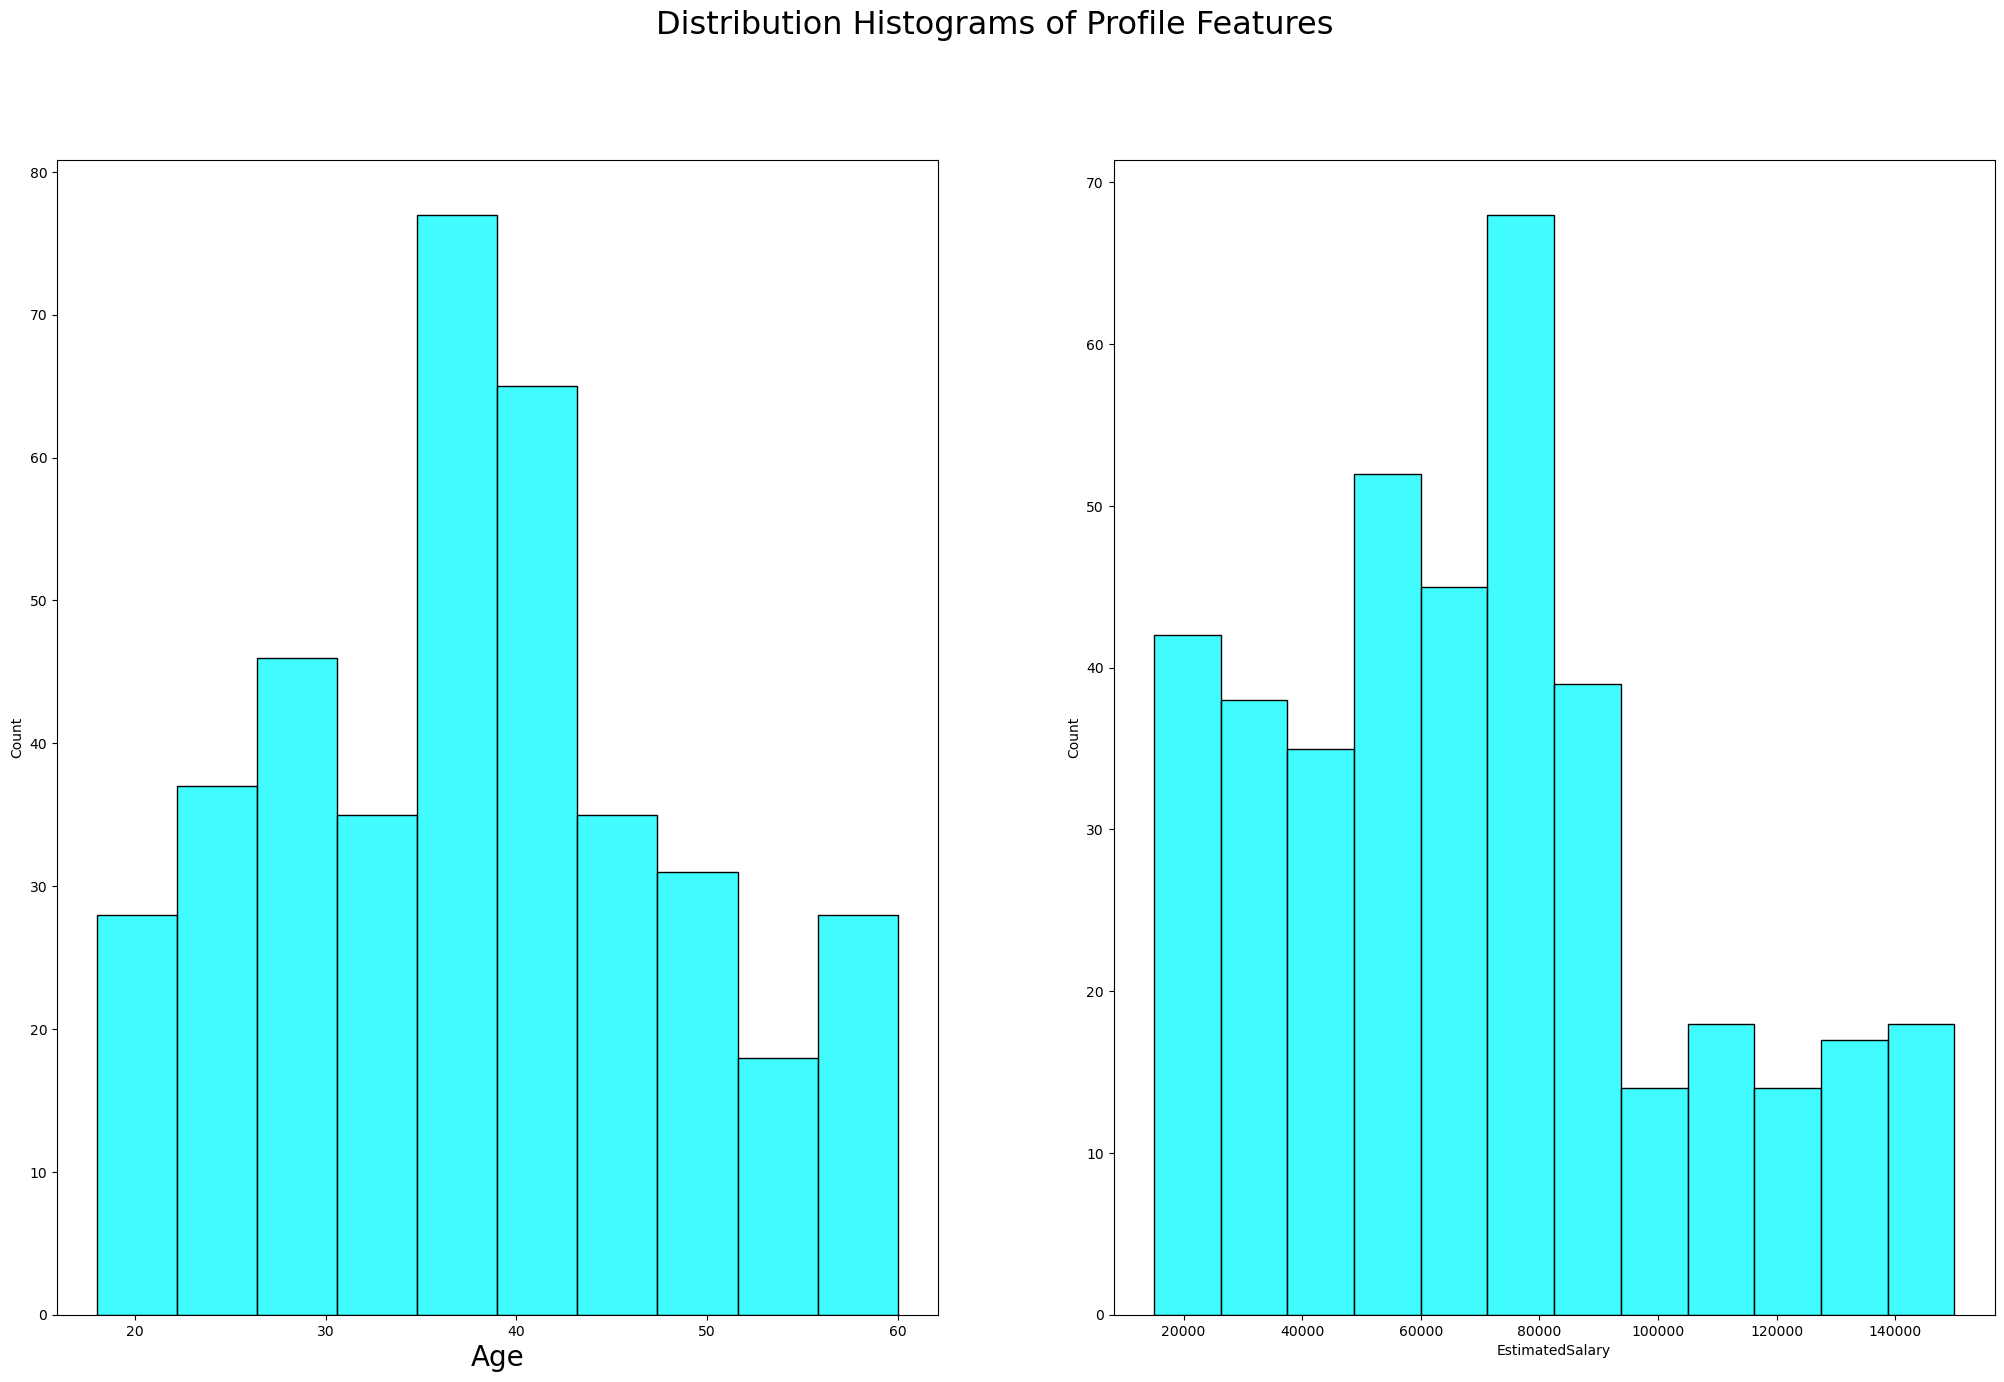

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(25,15))
fig.suptitle("Distribution Histograms of Profile Features", size=23)
f1 = sns.histplot(df["Age"], ax=axs[0], color="#00fbff")
f1.set_xlabel("Age", size=20)
f2 = sns.histplot(df["EstimatedSalary"], ax=axs[1], color="#00fbff")
#f2.set_xlabel("Purchased", Size=20)

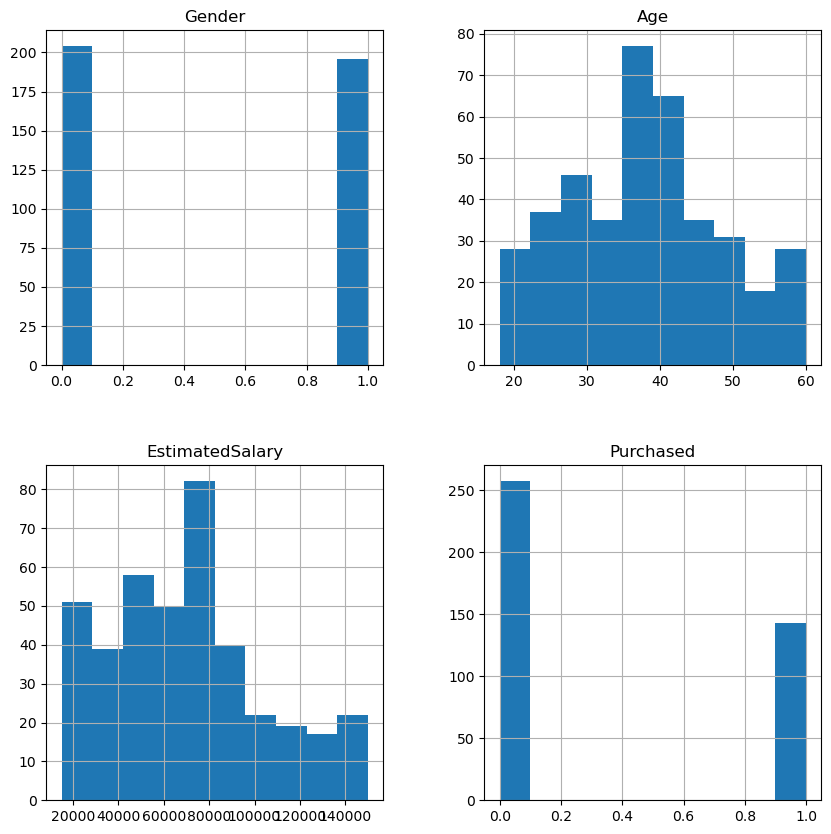

In [33]:
# to check all variables at once

df.hist( bins = 10, figsize = (10,10))
plt.show()

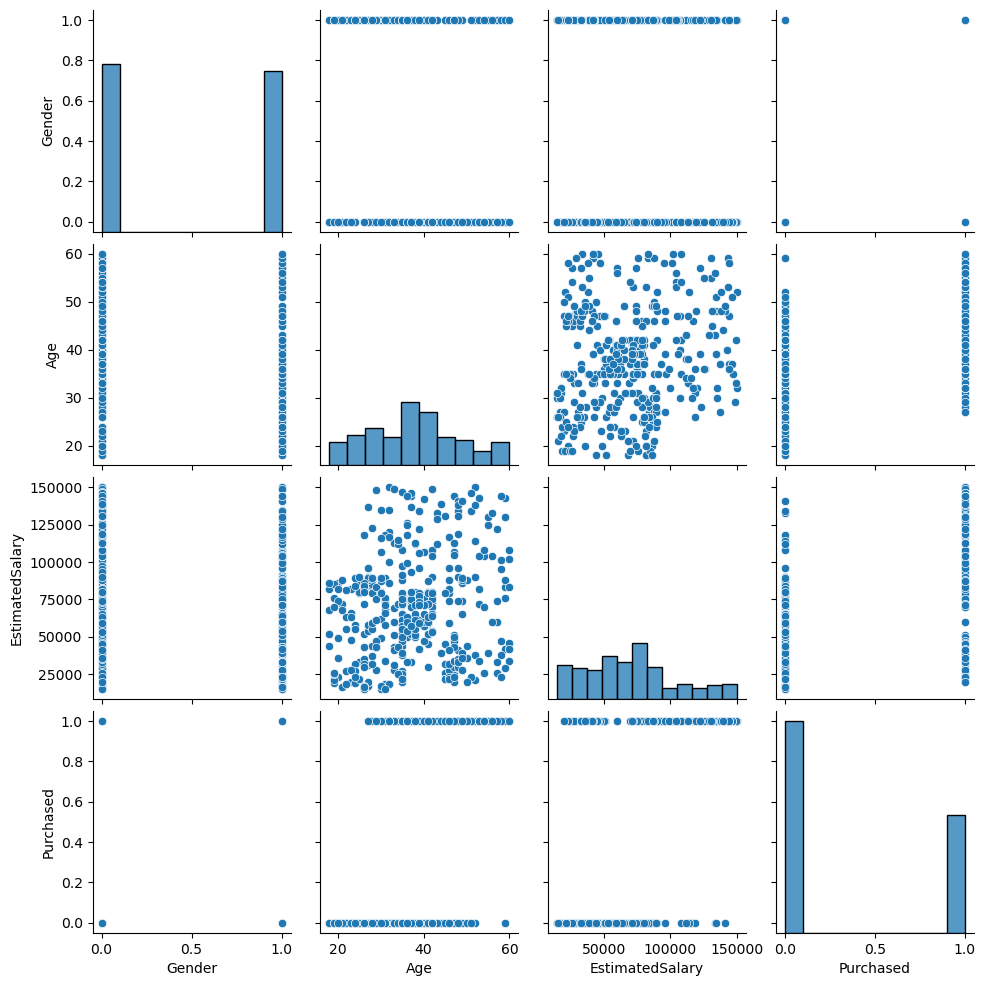

In [34]:

sns.pairplot(df, size=2.5)
plt.show()

<Axes: >

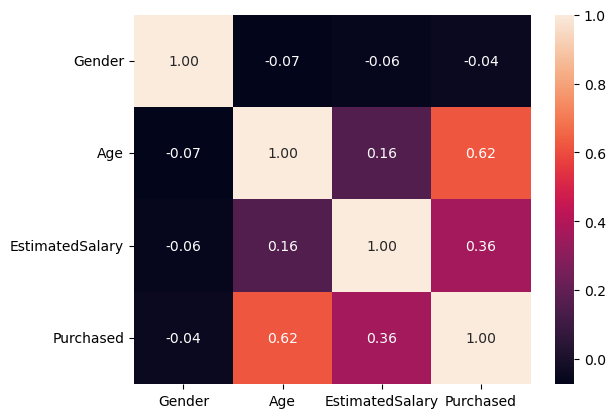

In [35]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

The Above Graph for Showing the linear correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Beige Color and least correlated features with black color.We can clearly see that only age has linearly related to the purchased.

In [36]:
a = df.groupby(['Purchased', 'Age'])
a.first()

Gender  EstimatedSalary
Purchased Age                         
0         18        1            82000
          19        1            19000
          20        1            86000
          21        0            16000
          22        1            18000
...               ...              ...
1         56        1           133000
          57        0           122000
          58        0           101000
          59        1           143000
          60        0           108000

[70 rows x 2 columns]

In [37]:
a = df.groupby(['Gender', 'Age'])
a.first()

EstimatedSalary  Purchased
Gender Age                            
0      18             44000          0
       19             21000          0
       20             23000          0
       21             16000          0
       22             63000          0
...                     ...        ...
1      56            133000          1
       57             74000          1
       58            144000          1
       59            143000          1
       60            102000          1

[83 rows x 2 columns]

In [38]:
a = df.groupby(['Purchased','EstimatedSalary'])
a.first()

Gender  Age
Purchased EstimatedSalary             
0         15000                 1   30
          16000                 0   21
          17000                 0   27
          18000                 1   32
          19000                 1   19
...                           ...  ...
1         146000                0   51
          147000                0   35
          148000                1   29
          149000                0   33
          150000                0   32

[166 rows x 2 columns]

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

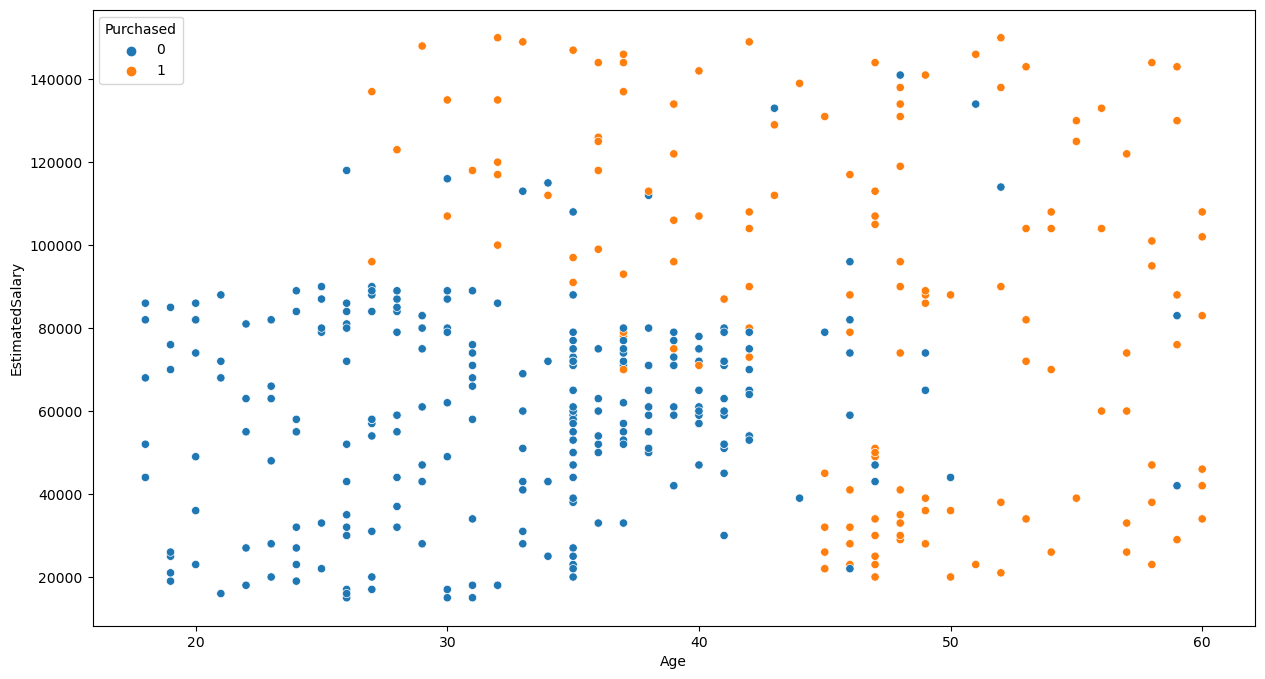

In [39]:
plt.figure(figsize = (15,8))
sns.scatterplot(y="EstimatedSalary", x="Age", data=df, hue = 'Purchased')

Milestone 3 you will begin the process of selecting, building, and evaluating a model. You are required to train and evaluate at least one model in this milestone. Write step-by-step for performing each of these steps. You can use any methods/tools you think are most appropriate, but you should explain/justify why you are selecting the model(s) and evaluation metric(s) you choose. It is important to think about what type of model and metric makes sense for your problem. Again, do what makes the most sense for your project. Write a short overview/conclusion of the insights gained from your model building/evaluation.

Model Training

Split the model into 75/25. to predict if someone purchased or not. 

In [40]:
x = df.iloc[:, [1, 2]]
y = df.iloc[:, 3]

In [41]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [43]:
X_train.head()

,Age,EstimatedSalary
250,44,39000
63,32,120000
312,38,50000
159,32,135000
283,52,21000


In [44]:
X_test.head()

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000


In [45]:
x.columns

Index(['Age', 'EstimatedSalary'], dtype='object')

In [46]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [47]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale

In [48]:
#using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[61  7]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        68
           1       0.79      0.81      0.80        32

    accuracy                           0.87       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.87      0.87      0.87       100



Choosing a K Value- Choice of k is very critical – A small value of k means that noise will have a higher influence on the result. A large value make it computationally expensive and kinda defeats the basic philosophy behind KNN (that points that are near might have similar densities or classes ) 

In [50]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

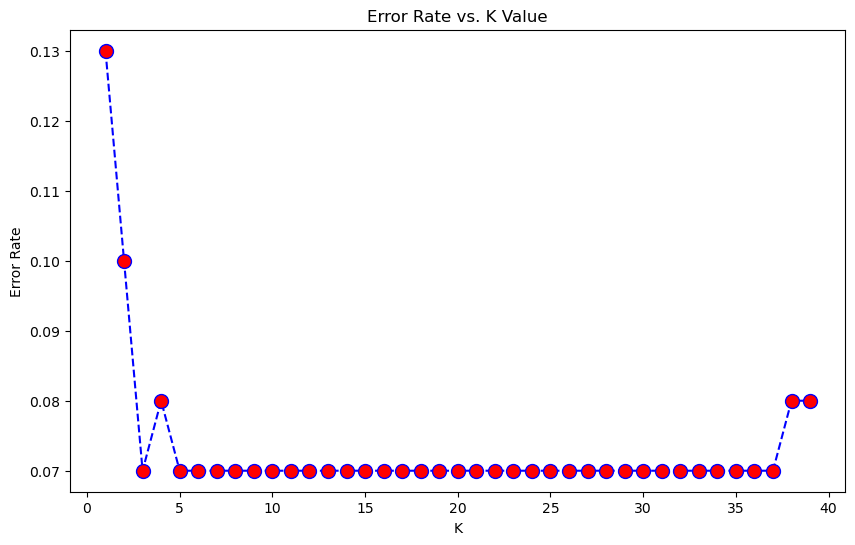

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>4 the error rate is decreasing and if we take those values that maked overfitting so we take k = 4. So Let's retrain the model with that and check the classification report!

In [52]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('WITH K=4')
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

WITH K=4


[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [53]:
from sklearn.metrics import accuracy_score
print ('accuracy_score : ', accuracy_score(y_test,knn_pred))

accuracy_score :  0.92


K fold Cross Validation
This technique is useful to evaluate bias and variance more accurately. It splits the training set into k groups, and in each iteration, the algorithm chooses different test fold (individual section) for testing. This allows every part of the training set to be used for testing.

In [54]:
from sklearn.model_selection import cross_val_score
knn_accuracy = cross_val_score(knn,x,y, cv = 5)

In [55]:
knn_accuracy

array([0.8125, 0.875 , 0.7375, 0.75  , 0.675 ])

In [56]:
knn_accuracy.mean()

0.7699999999999999

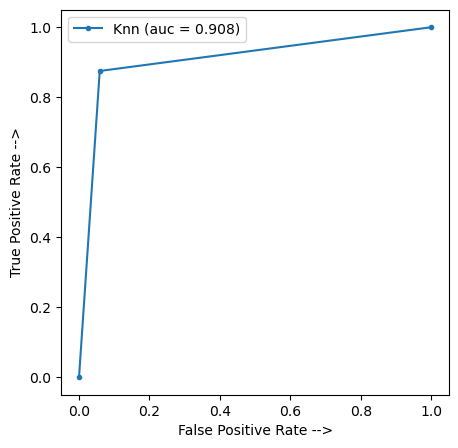

In [57]:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_pred)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='Knn (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

Building different classification models and use a K Fold cross validation to train the model with at least 5 fold cross validation.
1- Logestic Regression 
2-SVM
3-Random Forest Classification

In [58]:
#Logestic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

In [59]:
print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred))

[[65  3]
 [ 8 24]]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [60]:
#K-fold CV
log_accuracy = cross_val_score(log_reg,x,y, cv = 5)
print(log_accuracy)
print("mean value of accuracy",log_accuracy.mean())

[0.65   0.65   0.6375 0.8125 0.625 ]
mean value of accuracy 0.675


In [61]:
#SVM
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)

In [62]:
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [63]:
svc_accuracy = cross_val_score(svc_classifier,x,y, cv = 5)
print(svc_accuracy)
print("mean value of accuracy",svc_accuracy.mean())

[0.8125 0.8625 0.7375 0.8125 0.6375]
mean value of accuracy 0.7725


In [64]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [65]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[63  5]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



In [66]:
rf_accuracy = cross_val_score(rf_classifier,x,y, cv = 5)
print(rf_accuracy)
print("mean value of accuracy",rf_accuracy.mean())

[0.775  0.9375 0.8875 0.8125 0.825 ]
mean value of accuracy 0.8474999999999999


Run hyperparameter tuning on all the models and pick the best parameters 

In [67]:
#Applying grid search
from sklearn.model_selection import GridSearchCV
parameters = [{"C": [1, 10, 100, 1000], "kernel": ['linear']}, 
              {"C": [1, 10, 100, 1000], "kernel": ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001]}]

#Use this list to train
grid_search = GridSearchCV(estimator = svc_classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

#Use attributes of grid_search to get the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best accuracy: ",best_accuracy)
print(best_parameters)

Best accuracy:  0.9066666666666666
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [68]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0, C =10, gamma=0.1)
svc_classifier.fit(X_train, y_train)
svc_pred = svc_classifier.predict(X_test)

In [69]:
print("For SVM Classifier::")
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

For SVM Classifier::
[[64  4]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [70]:
#Random Forest Classification
n_estimators = [100, 300, 500]
max_depth = [5, 8, 15]
min_samples_leaf = [1, 2] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf_classifier, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [71]:
bestF.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=300,
                       random_state=0)

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, max_depth=5,min_samples_leaf=1)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

In [73]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[64  4]
 [ 2 30]]


              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



In [74]:
#Logestic Regression 
param_grid = [    
    {'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [75]:
a = best_clf.best_estimator_
a

LogisticRegression()

In [76]:
best_clf.best_params_

{'max_iter': 100, 'solver': 'lbfgs'}

In [77]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0, solver='lbfgs',max_iter=100 )
log_reg.fit(X_train,y_train)
log_pred = log_reg.predict(X_test)

In [78]:
print(confusion_matrix(y_test,log_pred))
print('\n')
print(classification_report(y_test,log_pred))

[[65  3]
 [ 8 24]]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [79]:
#KNN
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=10, verbose=True, n_jobs=-1)
#Fit the model
best_model = clf.fit(X_train,y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


In [80]:
best_model.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=7)

In [81]:
best_model.best_params_

{'leaf_size': 1, 'n_neighbors': 7, 'p': 2}

In [82]:
knn = KNeighborsClassifier(n_neighbors=9, p = 1, leaf_size=1)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[64  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



Summarizing the data all together 

In [83]:
# Using a confusion matrix to determine the accuracy of our model
from sklearn.metrics import confusion_matrix

print('Logistic Regression classifier:')
print(confusion_matrix(log_pred, y_test))

print('KNN Classifier:')
print(confusion_matrix(knn_pred, y_test))

print('Random Forest classifier:')
print(confusion_matrix(rf_pred, y_test))



Logistic Regression classifier:
[[65  8]
 [ 3 24]]
KNN Classifier:
[[64  3]
 [ 4 29]]
Random Forest classifier:
[[64  2]
 [ 4 30]]


In [84]:
# Printing the evaluation metrics to determine the accuracy of classifiers
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(log_pred, y_test))

print(accuracy_score(rf_pred, y_test))
print(accuracy_score(knn_pred, y_test))


0.89
0.94
0.93


In [85]:
# Printing the classification report
print('Logistic classifier:')
print(classification_report(y_test, log_pred))


print('Random Forest Classifier:')
print(classification_report(y_test, rf_pred))

print('KNN Classifier:')
print(classification_report(y_test, knn_pred))




Logistic classifier:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100

KNN Classifier:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted av

Based on the results , the Random FOrest method seems to be more accurate for predicting sales

 Try to Predict the target with maximum independent features

In [86]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [87]:
X1 = df.iloc[:,0: 3]
y1 = df.iloc[:, 3]

In [88]:
X1

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.30, random_state = 0)

In [90]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=5)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

In [91]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred))

[[76  3]
 [ 6 35]]


              precision    recall  f1-score   support

           0       0.93      0.96      0.94        79
           1       0.92      0.85      0.89        41

    accuracy                           0.93       120
   macro avg       0.92      0.91      0.92       120
weighted avg       0.92      0.93      0.92       120



Random Forest: Random Forest is an ensemble learning method that combines multiple decision trees to make more accurate predictions. It is commonly used for classification and regression tasks and is known for its ability to handle high-dimensional data and reduce overfitting.

Logistic Regression: Logistic regression is a statistical model used for binary classification tasks, where the target variable has two possible outcomes. It estimates the probability of an event occurring based on input variables and is widely used in various fields, such as healthcare, finance, and social sciences.

K-Nearest Neighbors (KNN): KNN is a simple yet effective algorithm used for classification and regression tasks. It assigns a new data point to the class or predicts the value based on the majority vote or average of its k nearest neighbors in the feature space.